[View in Colaboratory](https://colab.research.google.com/github/sathishix/Cryptocurrency-Correlation/blob/master/LinearRegression_Using_Tensorflow.ipynb)

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [4]:
#Uploading local file into Google Colab
from google.colab import files
uploaded = files.upload()

Saving Dataset.csv to Dataset.csv


In [0]:
#Read data from CSV into Numpy array
_read_data = np.genfromtxt ('Dataset.csv', delimiter=",")
_second_col =  _read_data[:,1]
_third_col = _read_data[:,2]

#Removing nan values from the array
_second_col = _second_col[~np.isnan(_second_col)]
_third_col=_third_col[~np.isnan(_third_col)]

ETC=_second_col.astype(float)
BTC=_third_col.astype(float)
steps=ETC.shape

# Model linear regression y = Wx + b
x = tf.placeholder(tf.float32, [None, 1])
W = tf.Variable(tf.zeros([1,1]))
b = tf.Variable(tf.zeros([1]))
product = tf.matmul(x,W)
y = product + b
y_ = tf.placeholder(tf.float32, [None, 1])





# Parameters
learning_rate = 0.0000001
training_epochs = 1000
display_step = 50



In [0]:
# Cost function sum((y_-y)**2)
cost = tf.reduce_mean(tf.square(y_-y))


In [0]:
# Training using Gradient Descent to minimize cost
train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [10]:
sess = tf.Session()
init = tf.initialize_all_variables()
sess.run(init)


for epoch in range(training_epochs):
  
  for i in range(steps[0]-1):
    xs=np.array([[ETC[i]]])
    ys=np.array([[BTC[i]]])
    
   
    # Train
    feed ={x: xs, y_: ys}
    sess.run(train_step, feed_dict=feed)

  # Display logs per epoch step
  if (epoch+1) % display_step == 0:
    c = sess.run(cost, feed_dict=feed)
    print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
          "W=", sess.run(W), "b=", sess.run(b))
  
  
print("Optimization Finished!")
training_cost = sess.run(cost, feed_dict=feed)
print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')
  


('Epoch:', '0050', 'cost=', '60642.714843750', 'W=', array([[12.634733]], dtype=float32), 'b=', array([1.8587873], dtype=float32))
('Epoch:', '0100', 'cost=', '59750.960937500', 'W=', array([[12.6256]], dtype=float32), 'b=', array([3.6921537], dtype=float32))
('Epoch:', '0150', 'cost=', '58871.406250000', 'W=', array([[12.616553]], dtype=float32), 'b=', array([5.513834], dtype=float32))
('Epoch:', '0200', 'cost=', '58003.917968750', 'W=', array([[12.607531]], dtype=float32), 'b=', array([7.323978], dtype=float32))
('Epoch:', '0250', 'cost=', '57148.179687500', 'W=', array([[12.598597]], dtype=float32), 'b=', array([9.122844], dtype=float32))
('Epoch:', '0300', 'cost=', '56304.230468750', 'W=', array([[12.589708]], dtype=float32), 'b=', array([10.910191], dtype=float32))
('Epoch:', '0350', 'cost=', '55471.902343750', 'W=', array([[12.580861]], dtype=float32), 'b=', array([12.686136], dtype=float32))
('Epoch:', '0400', 'cost=', '54650.863281250', 'W=', array([[12.572086]], dtype=float32)

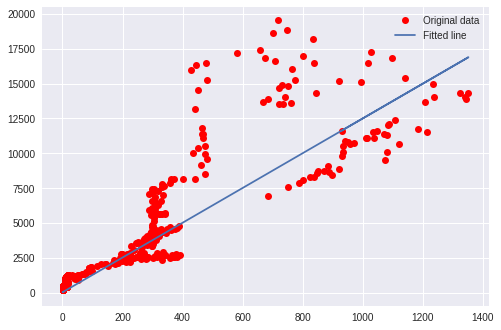

In [35]:
    # Graphic display
    plt.plot(ETC, BTC, 'ro', label='Original data')
    plt.plot(ETC, (sess.run(W) * ETC + sess.run(b))[0], label='Fitted line')
    plt.legend()
    plt.show()

   